# Visualization with Python

In this notebook, we'll practice making plots with various plotting libraries in Python

**Grading:** Two points for each question.

#### Q1. Install the needed packages so that the following code runs.

In [1]:
from plotnine import *
from matplotlib import pyplot as plt
from plotnine import data
import seaborn as sns

C:\Users\Jeremy\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
mpg = data.mpg
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


#### Q2. Bar Chart in Pandas

Use the `mpg` data given along with `pandas` (the plotting functionality within `pandas`) to approximate the following chart:

![pandas_bar](./pandas_bar.png)

Text(0.5,1,'Number of Cars by Make')

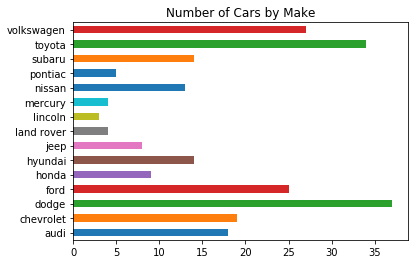

In [3]:
(mpg['manufacturer']
 .value_counts(sort=False)
 .plot.barh()
 .set_title('Number of Cars by Make')
)

#### Q3. Bar Chart in Plotnine

Use the `mpg` data given along with `plotnine` to approximate the following chart:

![plotnine_bar](./plotnine_bar.png)

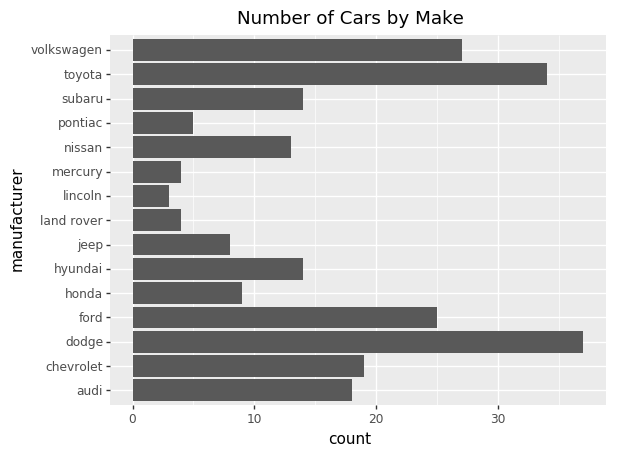

<ggplot: (135716540992)>

In [4]:
(ggplot(mpg) + 
   aes(x='manufacturer') +
   geom_bar(size=20) + 
   coord_flip() +
   ggtitle('Number of Cars by Make')
)

#### Q4. Histogram in Pandas

Use the plotting functionality in Pandas to approximate the following histogram (use `cty` of `mpg`)

![pandas_hist](./pandas_hist.png)

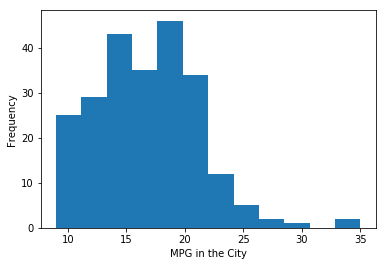

In [5]:
(mpg['cty']
 .plot
 .hist(bins=12))
plt.xlabel('MPG in the City');

#### Q5. Histogram in Matplotlib

Use `matplotlib` to approximate the previous histogram. (Don't use the plotting functionality within `pandas` for this one.) Use `cty` of `mpg`.

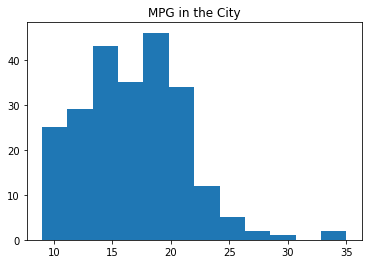

In [6]:
plt.hist('cty', bins=12, data=mpg)
plt.title('MPG in the City');

#### Q6. Histogram in Plotnine

Use Plotnine to approximate the following histogram

![plotnine_hist](./plotnine_hist.png)

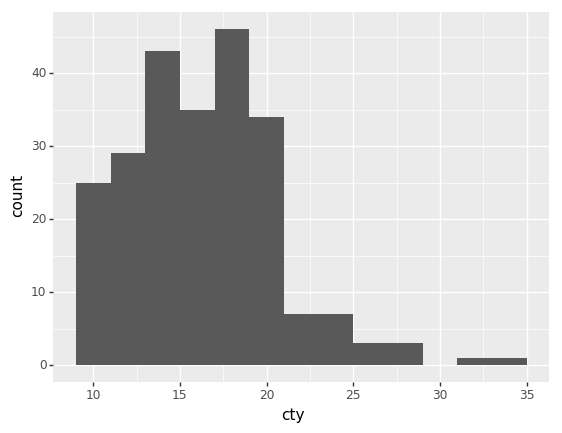

<ggplot: (135719004592)>

In [7]:
(ggplot(mpg) + 
    aes(x='cty') +
    geom_histogram(binwidth=2))

#### Q7. Scatter Plot in Pandas

Use `pandas` to approximate the following scatter plot.

![pandas_scatter](./pandas_scatter.png)

[Text(0,0.5,'Highway MPG'),
 Text(0.5,0,'Engine Displacement in Liters'),
 Text(0.5,1,'Engine Displacement in Liters vs Highway MPG')]

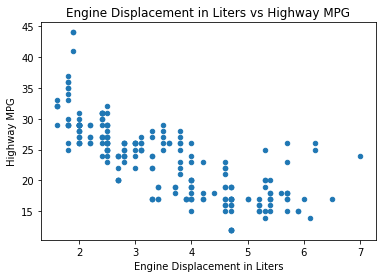

In [8]:
(mpg
 .plot
 .scatter(x='displ', y='hwy')
 .set(title='Engine Displacement in Liters vs Highway MPG',
      xlabel='Engine Displacement in Liters',
      ylabel='Highway MPG'))

#### Q8. Scatter Plot in Plotnine

Approximate the following scatter plot in `plotnine`

![plotnine_scatter](./plotnine_scatter.png)

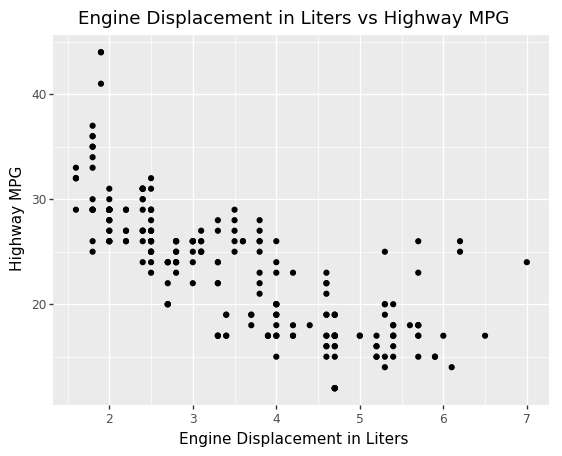

<ggplot: (135719057216)>

In [9]:
(ggplot(mpg) +
    aes(x = 'displ', y = 'hwy') +
    geom_point() + 
    ggtitle('Engine Displacement in Liters vs Highway MPG') +
    xlab('Engine Displacement in Liters') +
    ylab('Highway MPG'))

#### Q9. Faceted Scatter Plot with Seaborn

Use `seaborn` to approximate the following plot:

![seaborn_facet_one](./seaborn_facet_one.png)

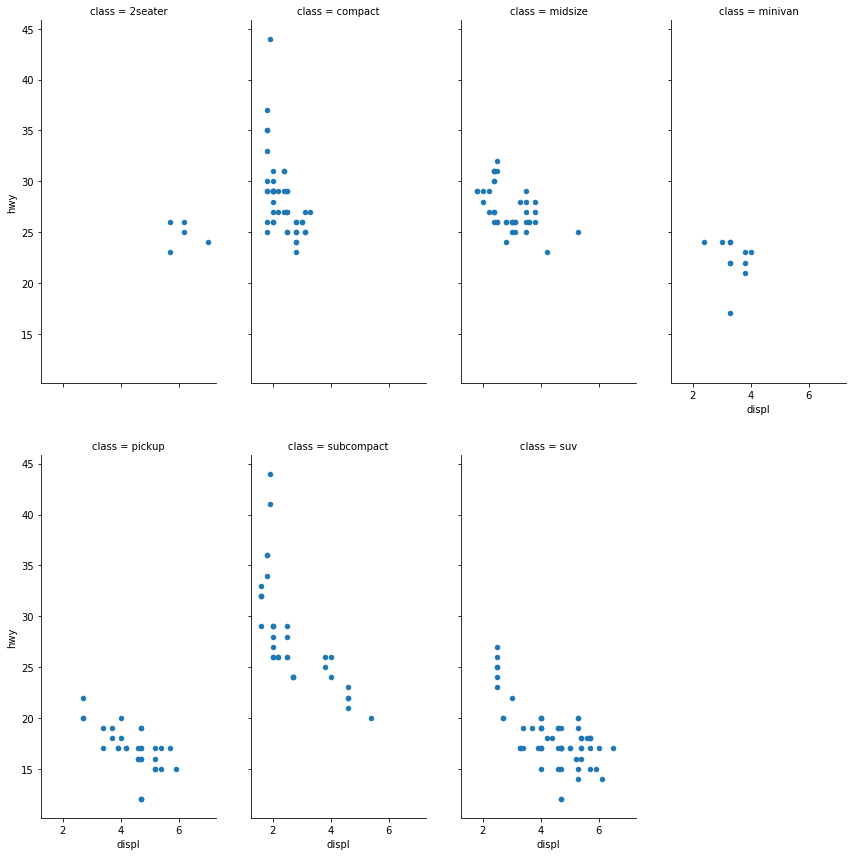

In [10]:
(mpg
 .pipe(sns.FacetGrid, 
       col='class', 
       col_wrap=4, 
       aspect=.5, 
       size=6)
 .map(plt.scatter, 'displ', 'hwy', s=20)
 .fig.subplots_adjust(wspace=.2, hspace=.2)
)

#### Q10. Faceted Scatter Plot with Plotnine

Use Plotnine to approximate the following plot.

![plotnine_facet_one](./plotnine_facet_one.png)

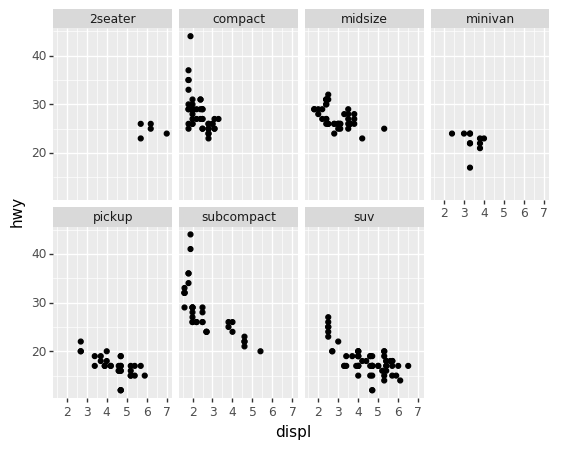

<ggplot: (135719487692)>

In [11]:
(ggplot(mpg.assign(c=mpg['class'])) + 
  aes(x='displ', y='hwy') +
  geom_point() +
  facet_wrap(' ~ c', nrow = 2))

#### Q11. Faceted Scatter Plot with Plotnine (part 2)

Use plotnine to approximate the following plot. Notice that this is faceted on two variables, `drv` and `cyl`. Each scatter plot within a facet is a scatter plot of `displ` and `hwy`.

![plotnine_facet_two](./plotnine_facet_two.png)

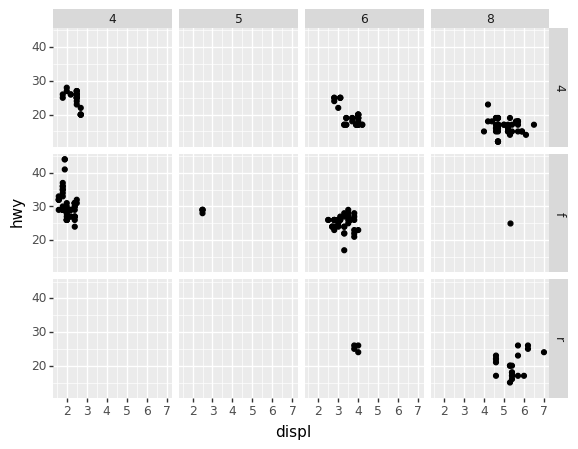

<ggplot: (-9223371901134954566)>

In [12]:
(ggplot(mpg) + 
  aes(x='displ', y='hwy') +
  geom_point() + 
  facet_grid('drv ~ cyl'))

#### Q12. Linear Regression with Scatter Plot in Seaborn

Use seaborn to approximate the following plot.

![seaborn_lm](./seaborn_lm.png)

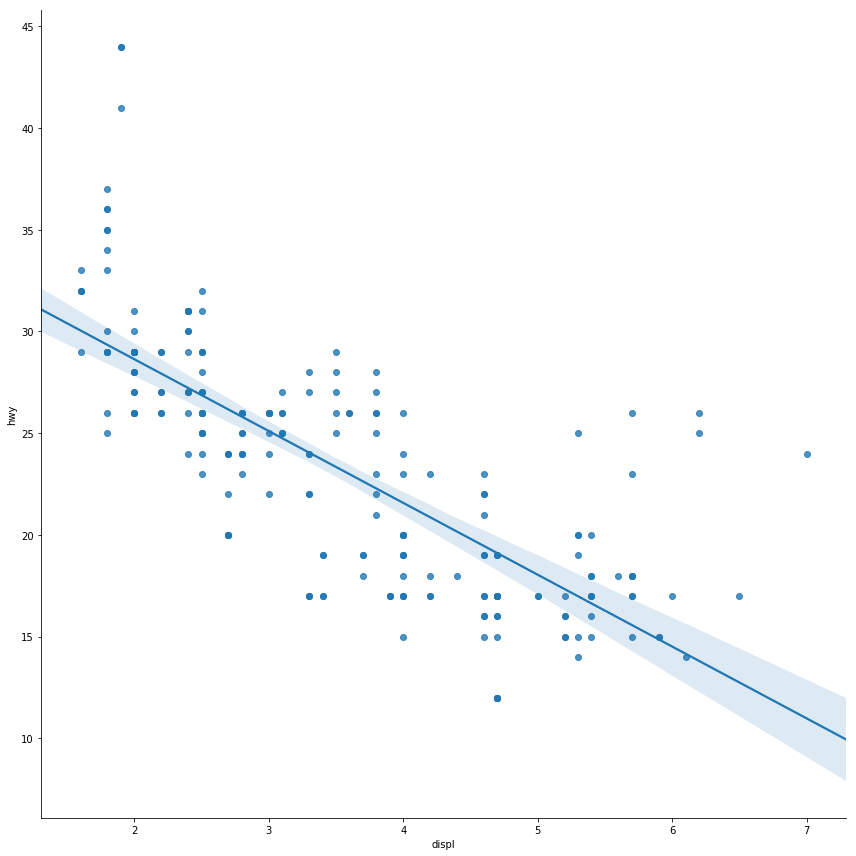

In [13]:
sns.lmplot(x='displ', y='hwy', 
           data=mpg, size=12)

#### Q13. Linear Regression with Scatter Plot in Plotnine

Use Plotnine to approximate the following plot.

![plotnine_lm](./plotnine_lm.png)

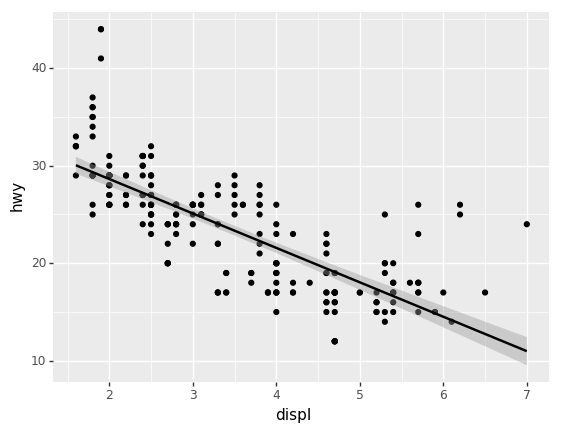

<ggplot: (-9223371901135556878)>

In [14]:
(ggplot(mpg) +
    aes('displ', 'hwy') +
    geom_point() +
    geom_smooth(method='lm'))

#### Q14. Use plotnine to create the following scatter plot with smooth fitted line

Use plotnine to approximate the following plot. Note that you will need to use the `loess` method of `geom_smooth`. To use this, you will need to install `scikit-misc`. You can do this by running the following command in your terminal: 
```
pip install scikit-misc
```
More information is here: https://github.com/has2k1/scikit-misc

![plotnine_smooth](./plotnine_smooth.png)

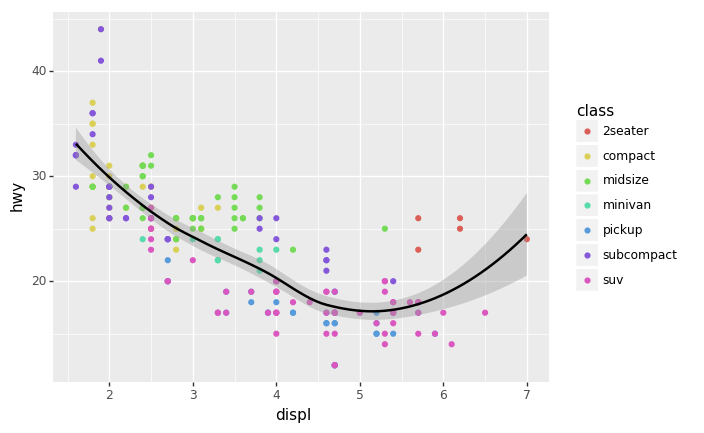

<ggplot: (135719200902)>

In [15]:
(ggplot(data=mpg, 
        mapping=aes(x='displ', y='hwy')) + 
  geom_point(mapping=aes(color = 'class')) + 
  geom_smooth(method = 'loess')
)